# Grippal OpenHealth

More info on the dataset (here)[http://www.openhealth.fr/ias]

### Question 1

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import periodogram

In [127]:
# Load the dataset
dataset = pd.read_csv('/home/jean/Documents/Openhealth_S-Grippal.csv')

In [128]:
# Take a look at the 5 first row
dataset.head()

,PERIODE,IAS_brut,IAS_lisse,Incidence_Sentinelles,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2009-07-01,1,7,2,2.0,2.0,3.0
1,2009-07-02,3,4,2,1.0,2.0,3.0
2,2009-07-03,2,1,2,1.0,2.0,3.0
3,2009-07-04,1,3,2,2.0,3.0,NaN
4,2009-07-05,14,2,2,2.0,3.0,NaN


In [129]:
# Renaming and using the cols we need
IAS_brut = dataset['IAS_brut']
Time = dataset['PERIODE']
n = len(Time)

In [130]:
# Dealing with 0 values
print((IAS_brut == 0).sum())

321


In [131]:
# Replacing by NaN 
IAS_brut = IAS_brut.replace(0, np.NaN)

In [132]:
sum(pd.isnull(IAS_brut))

321

In [133]:
# Using interpolate to replace missig values
IAS_brut = IAS_brut.interpolate(method ='linear', limit_direction ='forward') 

In [134]:
# Plus de donees manquantes
sum(pd.isnull(IAS_brut))

0

In [135]:
# Beginning of the dataset
Time[0]

'2009-07-01'

In [136]:
# End of the dataset
Time[n-1]

'2014-04-17'

### Question 2

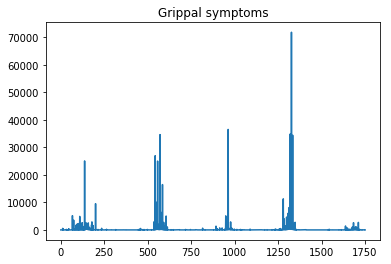

In [147]:
# Plotting the time serie
plt.title("Grippal symptoms")
plt.plot(IAS_brut)
plt.show()

We can see a lot of extreme values which are periodic on a yearly basis with is normal according to the fact that grippal symptoms are also periodic on a yearly basis with a peak during winter.

### Question 3

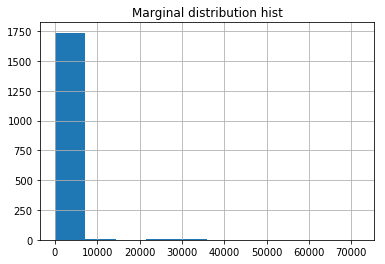

In [146]:
# Plotting the histogram to show disparity between the values
plt.title("Marginal distribution hist")
IAS_brut.hist()

Values are very concetrated and "normal values" will be preponderant, it means it will be difficult to predict extrema values.

### Question 4

In [154]:
# In order to lower the disparity effect we use the log transformation
log_IAS_brut = np.log(IAS_brut)

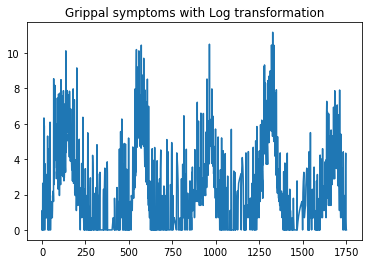

In [155]:
# We can check the influence of this transformation on the time serie
# and indeed disparity is less important which allow us to work more
# efficiently on the dataset
plt.title("Grippal symptoms with Log transformation")
plt.plot(log_IAS_brut)
plt.show()

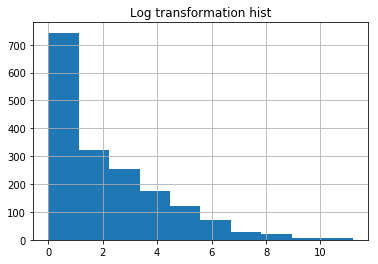

In [156]:
# Log histogram show a better repartition
plt.title("Log transformation hist")
log_IAS_brut.hist()

### Question 5

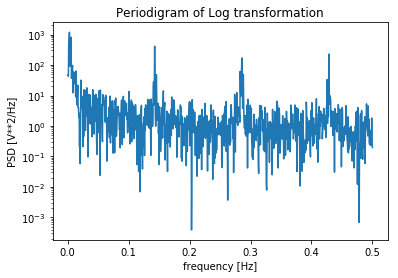

In [157]:
plt.title('Periodigram of Log transformation')
f, Pxx_den = periodogram(log_IAS_brut)
plt.semilogy(f[1:], Pxx_den[1:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()


In [158]:
# Take a look at the periodic values
print(Pxx_den[0:10])

[8.79651951e-29 4.67443731e+01 4.29338563e+01 5.12486502e+02
 6.78336835e+02 1.18695807e+03 1.70206770e+02 9.09409127e+01
 1.36185775e+02 8.19856908e+02]


Highlight a periodic signal.

Peaks = most important frequencies.

### Question 6

In [159]:
# In order to cancel the yearly effect, we perform a yearly basis subtraction
for i in range (len(log_IAS_brut)):
    if i>=365:
        log_IAS_brut[i]=(log_IAS_brut[i] - log_IAS_brut[i-365])

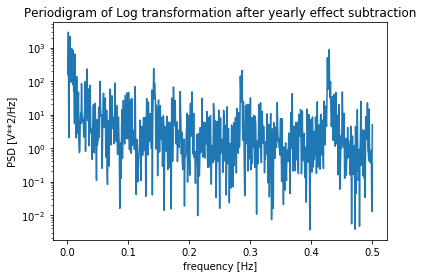

In [161]:
plt.title('Periodigram of Log transformation after yearly effect subtraction')

f, Pxx_den = periodogram(log_IAS_brut[365:])
plt.semilogy(f[1:], Pxx_den[1:])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [23]:
# Frequence for a year
1/365

0.0027397260273972603

In [24]:
f[0:10] # So we are interested in the 5th value

array([0.        , 0.00072098, 0.00144196, 0.00216294, 0.00288392,
       0.0036049 , 0.00432588, 0.00504686, 0.00576784, 0.00648882])

In [162]:
# Amplitude for the different frequences
print(Pxx_den[0:10])

[2.62991552e-30 1.56595237e+02 2.87411069e+03 2.03500085e+00
 5.95266486e+02 2.98604321e+02 2.16487949e+03 3.48796496e+02
 9.27817783e+01 6.47362485e+02]


We have removed the annual trend because the amplitude for the annual frequence was 10^2 before and 10^0 now!

### Question 7

In [25]:
# Using the log transfo
log_IAS_brut = np.log(IAS_brut)

In [26]:
log_IAS_brut=pd.DataFrame(log_IAS_brut)

In [27]:
log_IAS_brut.head()

,IAS_brut
0,0.000000
1,1.098612
2,0.693147
3,0.000000
4,2.639057


In [28]:
# We are adding explanatory variable according to the number of harmonics

def add_expl_var (n_harm,T=365):
    X_1=[]
    X_2=[]
    
    for k in range (1,n_harm+1):
               
        for t in range (0,len(log_IAS_brut)):
            
            X_1.append(np.cos(t*k*2*np.pi/T))
            X_2.append(np.sin(t*k*(2*np.pi)/T))
        
        
    return(X_1,X_2)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
# Creating the explanatory variable with 10 harmonics

X_1,X_2 = add_expl_var (10,T=365)

In [31]:
len(X_1)

17520

In [32]:
log_IAS_brut = np.log(IAS_brut)

In [33]:
log_IAS_brut=pd.DataFrame(log_IAS_brut)

In [34]:
# Select the corresponding explanatory variable

log_IAS_brut['Harmonique Cos 1'] = X_1[0:1752]
log_IAS_brut['Harmonique Sin 1'] = X_2[0:1752]

log_IAS_brut['Harmonique Cos 2'] = X_1[1752:3504]
log_IAS_brut['Harmonique Sin 2'] = X_2[1752:3504]

log_IAS_brut['Harmonique Cos 3'] = X_1[3504:5256]
log_IAS_brut['Harmonique Sin 3'] = X_2[3504:5256]

log_IAS_brut['Harmonique Cos 4'] = X_1[5256:7008]
log_IAS_brut['Harmonique Sin 4'] = X_2[5256:7008]

log_IAS_brut['Harmonique Cos 5'] = X_1[7008:8760]
log_IAS_brut['Harmonique Sin 5'] = X_2[7008:8760]

log_IAS_brut['Harmonique Cos 6'] = X_1[8760:10512]
log_IAS_brut['Harmonique Sin 6'] = X_2[8760:10512]

log_IAS_brut['Harmonique Cos 7'] = X_1[10512:12264]
log_IAS_brut['Harmonique Sin 7'] = X_2[10512:12264]

log_IAS_brut['Harmonique Cos 8'] = X_1[12264:14016]
log_IAS_brut['Harmonique Sin 8'] = X_2[12264:14016]

log_IAS_brut['Harmonique Cos 9'] = X_1[14016:15768]
log_IAS_brut['Harmonique Sin 9'] = X_2[14016:15768]

log_IAS_brut['Harmonique Cos 10'] = X_1[15768:17520]
log_IAS_brut['Harmonique Sin 10'] = X_2[15768:17520]

In [35]:
training_data = log_IAS_brut[0:1370] # trainig from day 0 to 2013-03-31
testing_data = log_IAS_brut[1370:1752] # testing from 2013-04-01 to 
                                       # 2014-04-17

In [36]:
# Renaming training and testing data in order to do various regressions to compare with 

y_train = training_data['IAS_brut']
X_train_1 = training_data[['Harmonique Cos 1','Harmonique Sin 1']]
X_train_2 = training_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2']]
X_train_3 = training_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3']]
X_train_4 = training_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4']]
X_train_5 = training_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5']]
X_train_6 = training_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5','Harmonique Cos 6','Harmonique Sin 6']]
X_train_7 = training_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5','Harmonique Cos 6','Harmonique Sin 6','Harmonique Cos 7','Harmonique Sin 7']]
X_train_8 = training_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5','Harmonique Cos 6','Harmonique Sin 6','Harmonique Cos 7','Harmonique Sin 7','Harmonique Cos 8','Harmonique Sin 8']]
X_train_9 = training_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5','Harmonique Cos 6','Harmonique Sin 6','Harmonique Cos 7','Harmonique Sin 7','Harmonique Cos 8','Harmonique Sin 8','Harmonique Cos 9','Harmonique Sin 9']]
X_train_10 = training_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5','Harmonique Cos 6','Harmonique Sin 6','Harmonique Cos 7','Harmonique Sin 7','Harmonique Cos 8','Harmonique Sin 8','Harmonique Cos 9','Harmonique Sin 9','Harmonique Cos 10','Harmonique Sin 10']]

y_test = testing_data['IAS_brut']
X_test_1 = testing_data[['Harmonique Cos 1','Harmonique Sin 1']]
X_test_2 = testing_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2']]
X_test_3 = testing_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3']]
X_test_4 = testing_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4']]
X_test_5 = testing_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5']]
X_test_6 = testing_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5','Harmonique Cos 6','Harmonique Sin 6']]
X_test_7 = testing_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5','Harmonique Cos 6','Harmonique Sin 6','Harmonique Cos 7','Harmonique Sin 7']]
X_test_8 = testing_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5','Harmonique Cos 6','Harmonique Sin 6','Harmonique Cos 7','Harmonique Sin 7','Harmonique Cos 8','Harmonique Sin 8']]
X_test_9 = testing_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5','Harmonique Cos 6','Harmonique Sin 6','Harmonique Cos 7','Harmonique Sin 7','Harmonique Cos 8','Harmonique Sin 8','Harmonique Cos 9','Harmonique Sin 9']]
X_test_10 = testing_data[['Harmonique Cos 1','Harmonique Sin 1','Harmonique Cos 2','Harmonique Sin 2','Harmonique Cos 3','Harmonique Sin 3','Harmonique Cos 4','Harmonique Sin 4','Harmonique Cos 5','Harmonique Sin 5','Harmonique Cos 6','Harmonique Sin 6','Harmonique Cos 7','Harmonique Sin 7','Harmonique Cos 8','Harmonique Sin 8','Harmonique Cos 9','Harmonique Sin 9','Harmonique Cos 10','Harmonique Sin 10']]


In [37]:
# Linear regression from 1 harmonics to 10 harmonics
reg_1 = LinearRegression().fit(X_train_1, y_train)
reg_2 = LinearRegression().fit(X_train_2, y_train)
reg_3 = LinearRegression().fit(X_train_3, y_train)
reg_4 = LinearRegression().fit(X_train_4, y_train)
reg_5 = LinearRegression().fit(X_train_5, y_train)
reg_6 = LinearRegression().fit(X_train_6, y_train)
reg_7 = LinearRegression().fit(X_train_7, y_train)
reg_8 = LinearRegression().fit(X_train_8, y_train)
reg_9 = LinearRegression().fit(X_train_9, y_train)
reg_10 = LinearRegression().fit(X_train_10, y_train)

In [163]:
# Keep track of the scores in order to make our choice

scores_reg = []
scores_reg.append(reg_1.score(X_test_1, y_test))
scores_reg.append(reg_2.score(X_test_2, y_test))
scores_reg.append(reg_3.score(X_test_3, y_test))
scores_reg.append(reg_4.score(X_test_4, y_test))
scores_reg.append(reg_5.score(X_test_5, y_test))
scores_reg.append(reg_6.score(X_test_6, y_test))
scores_reg.append(reg_7.score(X_test_7, y_test))
scores_reg.append(reg_8.score(X_test_8, y_test))
scores_reg.append(reg_9.score(X_test_9, y_test))
scores_reg.append(reg_10.score(X_test_10, y_test))

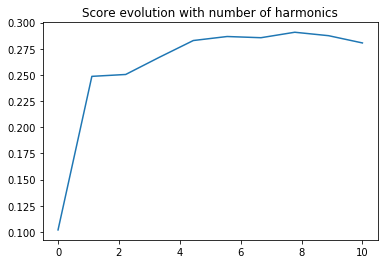

In [164]:
# Plot the score evolution

r = np.linspace(0, 10,10)
plt.plot(r,scores_reg) 
plt.title('Score evolution with number of harmonics')

plt.show()

8 seems to be the best choice

In [40]:
# record predictions in order to plot it

y_pred_1 = reg_1.predict(X_test_1)
y_pred_2 = reg_2.predict(X_test_2)
y_pred_3 = reg_3.predict(X_test_3)
y_pred_4 = reg_4.predict(X_test_4)
y_pred_5 = reg_5.predict(X_test_5)
y_pred_6 = reg_6.predict(X_test_6)
y_pred_7 = reg_7.predict(X_test_7)
y_pred_8 = reg_8.predict(X_test_8)
y_pred_9 = reg_9.predict(X_test_9)
y_pred_10 = reg_10.predict(X_test_10)

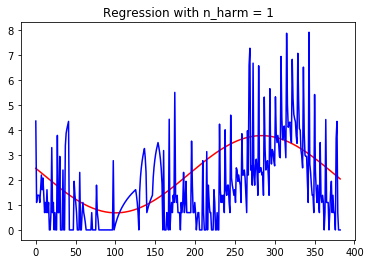

In [41]:
t = np.linspace(0, len(y_pred_1),len(y_pred_1))

plt.plot(t,y_pred_1, 'r') 
plt.plot(t,y_test, 'b') 
plt.title('Regression with n_harm = 1')

plt.show()

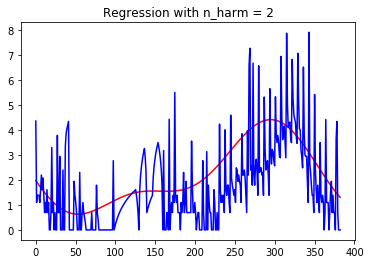

In [42]:
plt.plot(t,y_pred_2, 'r') 
plt.plot(t,y_test, 'b')
plt.title('Regression with n_harm = 2')

plt.show()

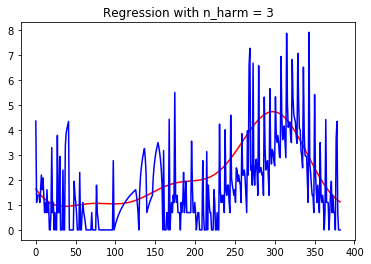

In [43]:
plt.plot(t,y_pred_3, 'r') 
plt.plot(t,y_test, 'b')
plt.title('Regression with n_harm = 3')

plt.show()

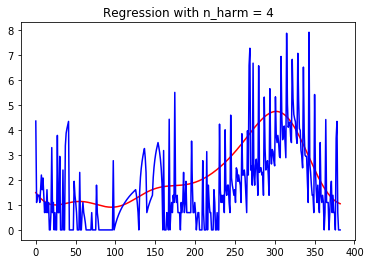

In [44]:
plt.plot(t,y_pred_4, 'r') 
plt.plot(t,y_test, 'b')
plt.title('Regression with n_harm = 4')

plt.show()

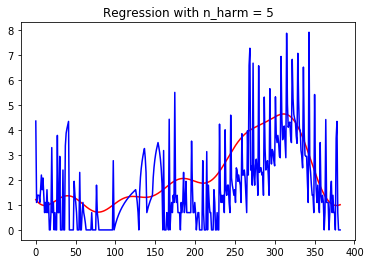

In [45]:
plt.plot(t,y_pred_5, 'r') 
plt.plot(t,y_test, 'b')
plt.title('Regression with n_harm = 5')

plt.show()

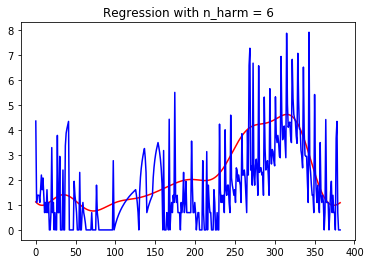

In [46]:
plt.plot(t,y_pred_6, 'r') 
plt.plot(t,y_test, 'b')
plt.title('Regression with n_harm = 6')

plt.show()

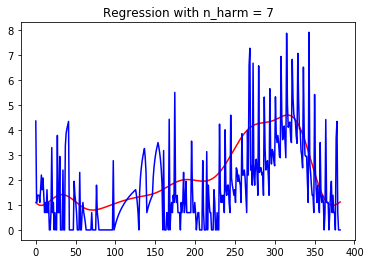

In [47]:
plt.plot(t,y_pred_7, 'r') 
plt.plot(t,y_test, 'b')
plt.title('Regression with n_harm = 7')

plt.show()

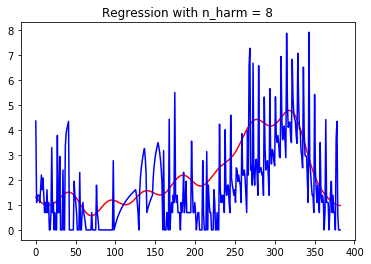

In [48]:
plt.plot(t,y_pred_8, 'r') 
plt.plot(t,y_test, 'b')
plt.title('Regression with n_harm = 8')

plt.show()

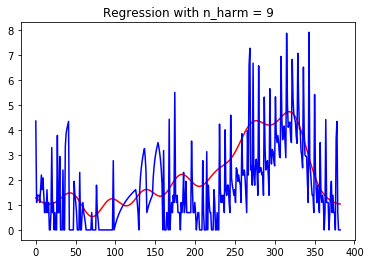

In [49]:
plt.plot(t,y_pred_9, 'r') 
plt.plot(t,y_test, 'b')
plt.title('Regression with n_harm = 9')

plt.show()

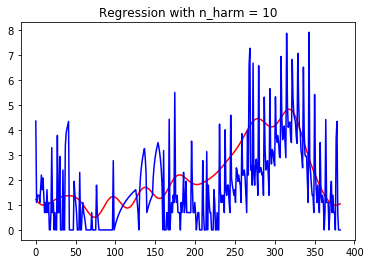

In [50]:
plt.plot(t,y_pred_10, 'r') 
plt.plot(t,y_test, 'b')
plt.title('Regression with n_harm = 10')

plt.show()

We can see that before 8, the regression is quite bad because not sensitive enough and after 8 it seems to be to much sensitive.

# Internet Trafic

### Question 8

In [51]:
dataset_internet = pd.read_csv('/home/jean/Downloads/lbl-tcp-3/lbl-tcp-3.tcp',header=None,sep=' ')

In [52]:
dataset_internet.head()

,0,1,2,3,4,5
0,7.591038e+08,1,2,23,2436,1
1,1.044500e-02,2,1,2436,23,2
2,2.377500e-02,1,2,23,2436,2
3,2.655800e-02,2,1,2436,23,1
4,2.900200e-02,3,4,3930,119,42


In [54]:
# Creating the time serie with a 10 sec interval

time_step=dataset_internet[0][0]
time_serie=[]
n=0
for i in range (len(dataset_internet[0]+1)):
    n=n+1
    if abs(dataset_internet[0][i]-time_step)>10:
        time_step = dataset_internet[0][i]
        time_serie.append(n)
        n=0

In [55]:
len(time_serie)

720

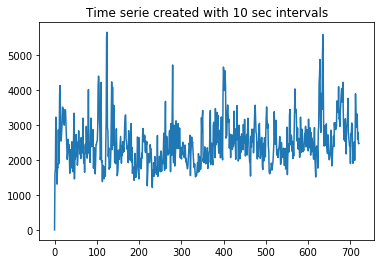

In [56]:
# plot the time serie
r = np.linspace(0, len(time_serie),len(time_serie))
plt.plot(r,time_serie) 
plt.title('Time serie created with 10 sec intervals')

plt.show()

### Question 9 and 10

In [57]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [58]:
# Fitting the first arima model on all the dataset

# We fit with a lag value of 10 for autoregression 
# using a difference order of 1 to make it stationary
# and using a moving average model of 0.

model = ARIMA(time_serie, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  719
Model:                ARIMA(10, 1, 0)   Log Likelihood               -5515.046
Method:                       css-mle   S.D. of innovations            518.598
Date:                Thu, 31 Oct 2019   AIC                          11054.091
Time:                        16:02:42   BIC                          11109.026
Sample:                             1   HQIC                         11075.300
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9366      6.656      0.291      0.771     -11.108      14.981
ar.L1.D.y     -0.3701      0.038     -9.865      0.000      -0.444      -0.297
ar.L2.D.y     -0.3184      0.040     -7.987      0.0

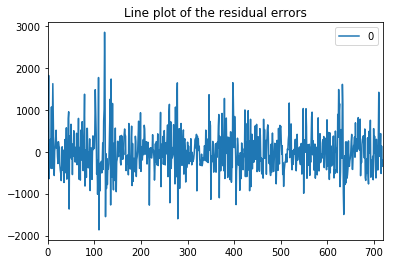

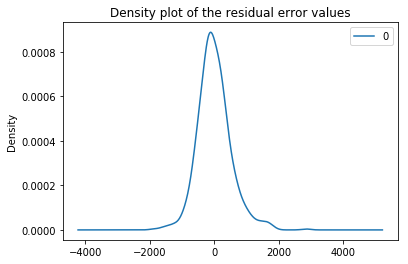

                 0
count   719.000000
mean      3.240877
std     519.966089
min   -1866.062883
25%    -310.316848
50%     -53.696996
75%     271.178035
max    2851.219684


In [59]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('Line plot of the residual errors')
plt.show()
residuals.plot(kind='kde')
plt.title('Density plot of the residual error values')
plt.show()
print(residuals.describe())

On the first plot we can see that there may still be some trend information not captured by the model according to the residual errors.

On the second plot, we can see errors are Gausian, but not centered in zero.

predicted=2565.707463, expected=2311.000000
predicted=2516.252244, expected=2617.000000
predicted=2818.019882, expected=2460.000000
predicted=2681.698910, expected=2075.000000
predicted=2356.806164, expected=2230.000000
predicted=2433.543467, expected=3225.000000
predicted=3017.873738, expected=2812.000000
predicted=2700.063411, expected=2221.000000
predicted=2362.965745, expected=2298.000000
predicted=2458.738693, expected=2881.000000
predicted=2736.557472, expected=2468.000000
predicted=2462.739897, expected=2238.000000
predicted=2332.263639, expected=2298.000000
predicted=2414.236551, expected=2276.000000
predicted=2310.488672, expected=2501.000000
predicted=2475.336322, expected=2760.000000
predicted=2694.445749, expected=2637.000000
predicted=2598.345773, expected=2964.000000
predicted=2750.095595, expected=2373.000000
predicted=2486.646826, expected=2516.000000
predicted=2556.766889, expected=2860.000000
predicted=2742.661832, expected=2866.000000
predicted=2724.552668, expected=

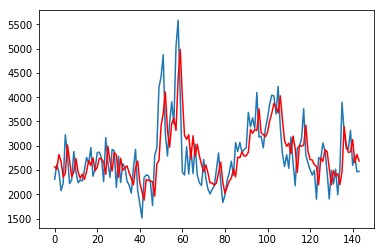

In [60]:
# Using ARIMA to forecast

size = int(len(time_serie) * 0.8)
train, test = time_serie[0:size], time_serie[size:len(time_serie)]
history = [x for x in train]
predictions = list()

# A rolling forecast is required given the dependence on observations 
# in prior time steps for differencing and the AR model. A crude way 
# to perform this rolling forecast is to re-create the ARIMA model 
# after each new observation is received.

for t in range(len(test)):
    model = ARIMA(history, order=(10,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()